In [2]:
!pip install bubbly
# for some basic operations
import numpy as np 
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

In [3]:
data_2017 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [5]:
data_2017.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
print("Data dims : ", data_2017.shape)

Data dims :  (158, 12)


In [8]:
data_2017.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
# Information about the Variables
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:

# Let's calculate the number of null values
data_2017.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [13]:
data_2017.duplicated().sum()

0

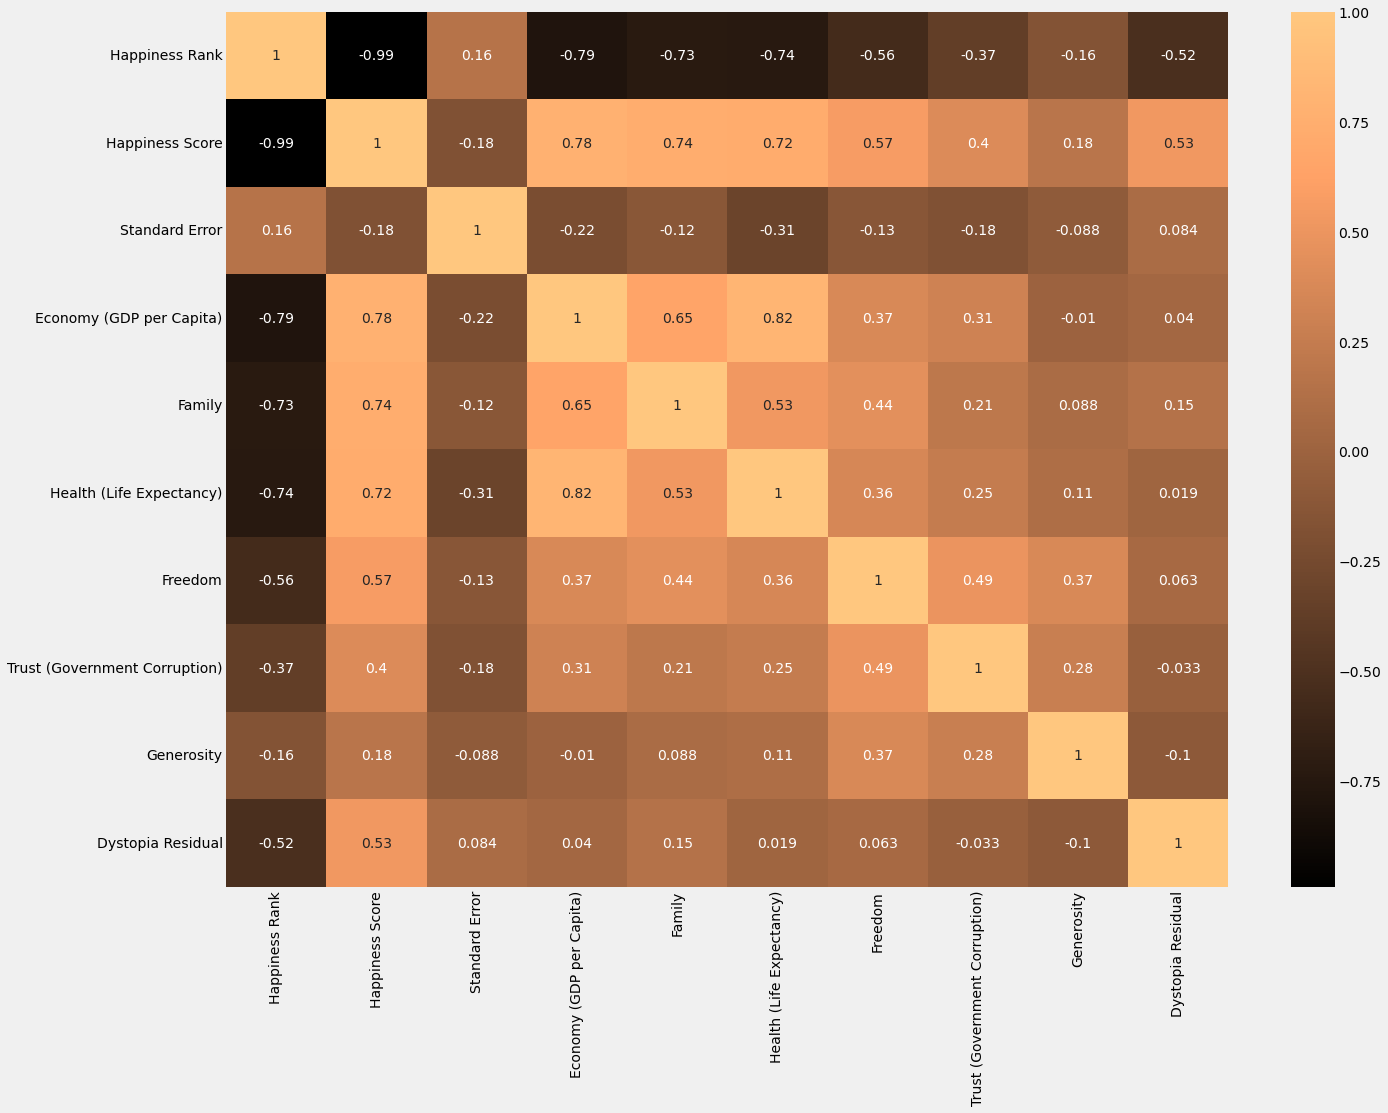

In [11]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(data_2017.corr(), cmap = 'copper', annot = True)

plt.show()

In [12]:

data_2017.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [14]:
data_2017.sort_values(by="Happiness Rank", ascending=True).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [21]:
data_2017.sort_values(by="Happiness Rank", ascending=False).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


In [22]:
Region = data_2017.groupby('Region')

In [23]:
Region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


In [24]:
Region['Happiness Score'].describe().sort_values(by="mean",ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,7.285000,0.001414,7.284,7.28450,7.285,7.28550,7.286
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253


In [25]:
WHR_A = data_2017[data_2017['Region'] == 'Africa']
WHR_WE = data_2017[data_2017['Region'] == 'Western Europe']
WHR_EE = data_2017[data_2017['Region'] == 'Eastern Europe']
WHR_LA = data_2017[data_2017['Region'] == 'Latin America']
WHR_AP = data_2017[data_2017['Region'] == 'Asia-Pacific']
WHR_NA = data_2017[data_2017['Region'] == 'North America']

In [26]:
len(WHR_A[WHR_A['Happiness Score'] > 6])

0

In [27]:
print("There are {} countries in Africa that have a happiness score above 6.0 ".format(len(WHR_A[WHR_A['Happiness Score'] > 6])))

There are 0 countries in Africa that have a happiness score above 6.0 


In [28]:
len(WHR_WE[WHR_WE['Happiness Score'] > 6])
print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(WHR_WE[WHR_WE['Happiness Score'] > 6])))


There are 16 countries in Western Europe that have a happiness score above 6.0 


In [29]:
len(WHR_EE[WHR_EE['Happiness Score'] > 6])

0

In [43]:
data_2017 = data_2017.replace('Western Europe', 'Central and Eastern Europe')

In [42]:
data_2017 = data_2017.replace('Western Europe', 'Western Europe')

In [41]:
data_2017 = data_2017.replace('Eastern Asia', 'Eastern Asia')
data_2017 = data_2017.replace('Eastern Asia', 'Southeastern Asia')
data_2017 = data_2017.replace('Eastern Asia', 'Southern Asia')

In [40]:
data_2017 = data_2017.replace('Sub-Saharan', 'Sub-Saharan Africa')
data_2017 = data_2017.replace('Sub-Saharan', 'Middle East and Northern Africa')

In [44]:
Region['Happiness Score'].describe().sort_values(by="mean",ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,7.285000,0.001414,7.284,7.28450,7.285,7.28550,7.286
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253


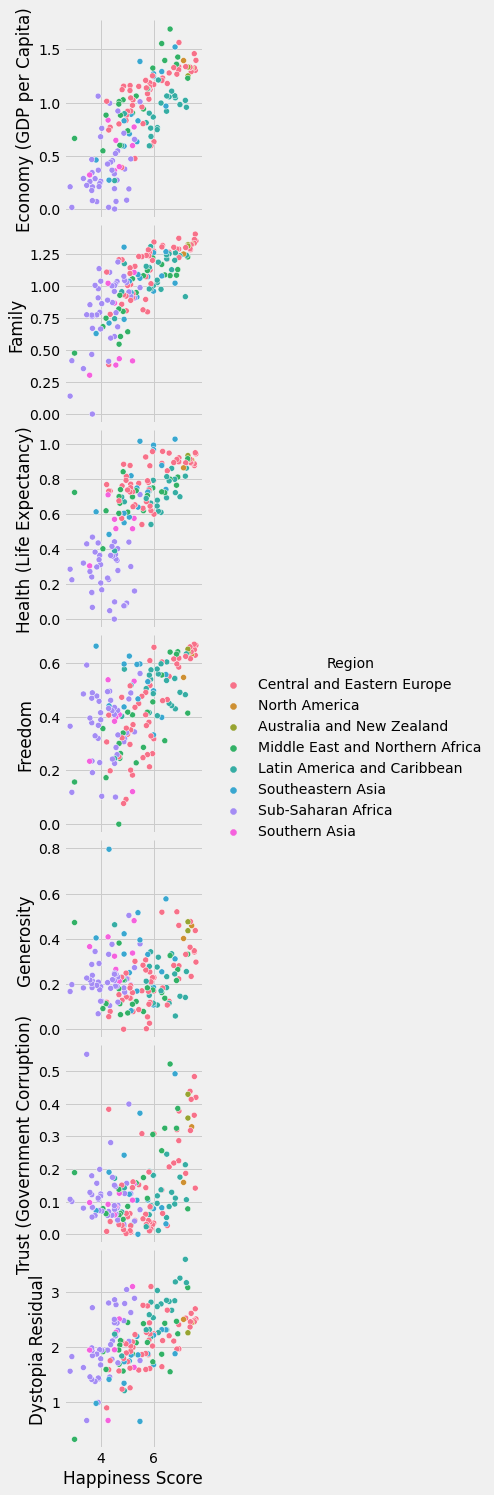

In [52]:
# seabornEconomy (GDP per Capita)	
sns.pairplot(data_2017, x_vars = ['Happiness Score'], y_vars=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Generosity','Trust (Government Corruption)','Dystopia Residual'], hue='Region', height=3)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8340\3231827822.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

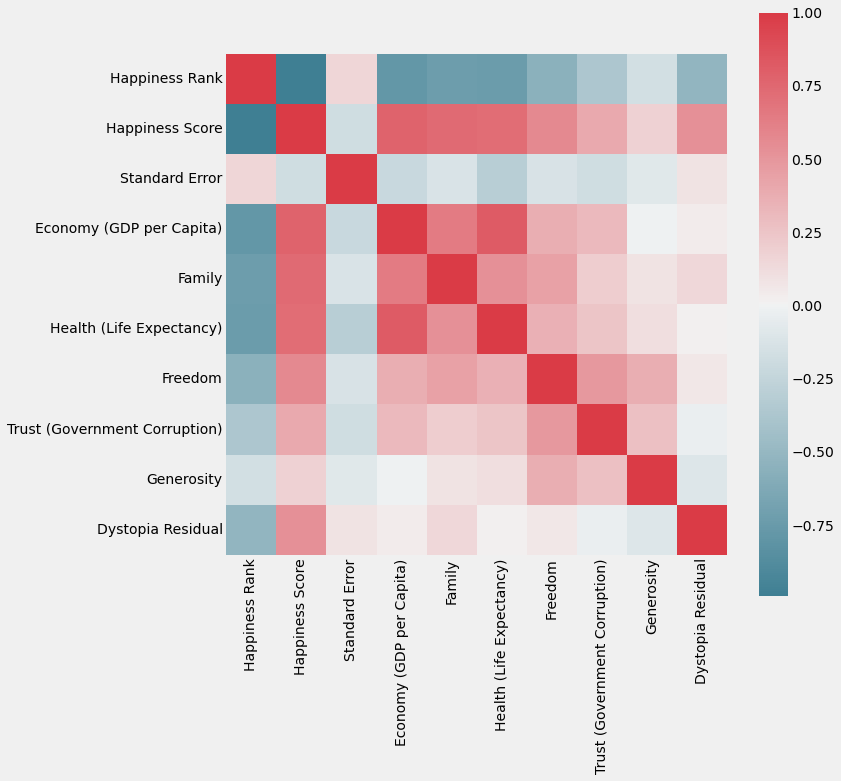

In [55]:
corr = data_2017.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [56]:
data_2017[data_2017['Happiness Score'] > 6].shape[0]

44

In [60]:
data_2017[(data_2017['Happiness Score'] > 6) & (data_2017['Region'] == 'Central and Eastern Europe')].shape[0]

18

In [61]:
float(len(data_2017[(data_2017['Happiness Score'] > 6) & (data_2017['Region'] == 'Central and Eastern Europe')]))/float(len(data_2017[data_2017['Happiness Score'] > 6]))


0.4090909090909091

In [62]:
print("The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is {0:.0%}".format(float(data_2017[(data_2017['Happiness Score'] > 6) & (data_2017['Region'] == 'Central and Eastern Europe')].shape[0]
)/float(data_2017[data_2017['Happiness Score'] > 6].shape[0])))


The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is 41%
